# Разведочный анализ данных
Вспомним, что за набор данных был в прошлый раз

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.pylabtools import figsize
figsize(10, 10) # зададим размер картинки

data = pd.read_csv('boston_crime.csv', sep=',')
data.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192062057,619,Larceny,LARCENY ALL OTHERS,B3,444,NaN,2019-08-08 21:15:00,2019,8,Thursday,21,Part One,BLUE HILL AVE,42.295764,-71.087560,"(42.29576380, -71.08756002)"
1,I192062054,3115,Investigate Person,INVESTIGATE PERSON,D4,156,NaN,2019-08-08 21:04:00,2019,8,Thursday,21,Part Three,W CONCORD ST,42.339620,-71.076992,"(42.33961962, -71.07699237)"
2,I192062049,1402,Vandalism,VANDALISM,NaN,,NaN,2019-08-08 21:19:00,2019,8,Thursday,21,Part Two,NaN,NaN,NaN,"(0.00000000, 0.00000000)"
3,I192062044,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,D4,162,NaN,2019-08-08 19:31:00,2019,8,Thursday,19,Part Three,HARRISON AVE,42.344967,-71.063822,"(42.34496729, -71.06382224)"
4,I192062043,3201,Property Lost,PROPERTY - LOST,D4,141,NaN,2019-08-08 19:15:00,2019,8,Thursday,19,Part Three,NEWBURY ST,42.348406,-71.086883,"(42.34840576, -71.08688339)"
5,I192062042,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,D4,617,NaN,2019-08-08 19:08:00,2019,8,Thursday,19,Part Three,HUNTINGTON AVE,42.337923,-71.095266,"(42.33792266, -71.09526598)"
6,I192062039,3115,Investigate Person,INVESTIGATE PERSON,C11,359,NaN,2019-08-08 20:39:00,2019,8,Thursday,20,Part Three,WASHINGTON ST,42.294814,-71.072009,"(42.29481426, -71.07200871)"
7,I192062036,3115,Investigate Person,INVESTIGATE PERSON,B2,585,NaN,2019-08-08 20:09:00,2019,8,Thursday,20,Part Three,PARKER HILL AVE,42.330335,-71.107499,"(42.33033485, -71.10749865)"
8,I192062035,3410,Towed,TOWED MOTOR VEHICLE,B3,465,NaN,2019-08-08 19:04:00,2019,8,Thursday,19,Part Three,WILCOCK ST,42.286889,-71.092230,"(42.28688930, -71.09222991)"
9,I192062034,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,E18,537,NaN,2019-08-08 20:03:00,2019,8,Thursday,20,Part Three,KOVEY RD,NaN,NaN,"(0.00000000, 0.00000000)"


In [6]:
def dropper(X):
    X = X.drop(['INCIDENT_NUMBER', 'REPORTING_AREA', 'OFFENSE_CODE_GROUP', 'OCCURRED_ON_DATE', 'UCR_PART',
                 'OFFENSE_DESCRIPTION', 'STREET'],
                 axis='columns')
    return X

def other_transformations(X):
    def shoot_nans(value):
        if value == 'Y':
            return 1
        if pd.isnull(value):
            return 0
    def dig(s):
        s_int = ''
        i = 0
        for i in range(len(s)):
            try:
                s_int += str(int(s[i]))
            except ValueError as err:
                continue
            return s_int
    def distr_nans(value):
        sec = {
            'A': '1',
            'B': '2',
            'C': '3',
            'D': '4',
            'E': '5'
        }
        if pd.isnull(value):
            return 0
        else:
            return int(sec[value[0]])
    def d_nans(value):
        if pd.isnull(value):
            return 0
        else:
            return int(dig(value))
    def loc_nans(value):
        if pd.isnull(value):
            return 0
        else:
            return value*1000000

    def week (value):
        weekdays = {
            'Monday' : 1,
            'Tuesday' : 2,
            'Wednesday' : 3, 
            'Thursday' : 4, 
            'Friday' : 5, 
            'Saturday' : 6, 
            'Sunday' : 7
        }
        return weekdays[value]

    for col in ['DISTRICT']:
        X['Location']= X[col].apply(d_nans)
        X[col]= X[col].apply(distr_nans)
    for col in ['Lat', 'Long']:
        X[col]=X[col].apply(loc_nans)
    for col in ['SHOOTING']:
        X[col] = X[col].apply(shoot_nans)
    X['DAY_OF_WEEK'] = X['DAY_OF_WEEK'].apply(week)
    return X
data = other_transformations(dropper(data))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411033 entries, 0 to 411032
Data columns (total 10 columns):
OFFENSE_CODE    411033 non-null int64
DISTRICT        411033 non-null int64
SHOOTING        411033 non-null int64
YEAR            411033 non-null int64
MONTH           411033 non-null int64
DAY_OF_WEEK     411033 non-null int64
HOUR            411033 non-null int64
Lat             411033 non-null float64
Long            411033 non-null float64
Location        411033 non-null int64
dtypes: float64(2), int64(8)
memory usage: 31.4 MB


Почистим данные, как в прошлый раз

In [8]:
X = data.drop('SHOOTING', axis='columns')
y = data['SHOOTING']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
# обратите внимание на параметр stratify - чуть позже мы его обсудим

In [7]:
data.head(10)

,OFFENSE_CODE,DISTRICT,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long,Location
0,619,2,0,2019,8,4,21,42295763.80,-71087560.02,3
1,3115,4,0,2019,8,4,21,42339619.62,-71076992.37,4
2,1402,0,0,2019,8,4,21,0.00,0.00,0
3,3006,4,0,2019,8,4,19,42344967.29,-71063822.24,4
4,3201,4,0,2019,8,4,19,42348405.76,-71086883.39,4
5,3006,4,0,2019,8,4,19,42337922.66,-71095265.98,4
6,3115,3,0,2019,8,4,20,42294814.26,-71072008.71,1
7,3115,2,0,2019,8,4,20,42330334.85,-71107498.65,2
8,3410,2,0,2019,8,4,19,42286889.30,-71092229.91,3
9,3006,5,0,2019,8,4,20,0.00,0.00,1


## Структура данных
Посмотрим на распределения и возможные зависимости признаков.

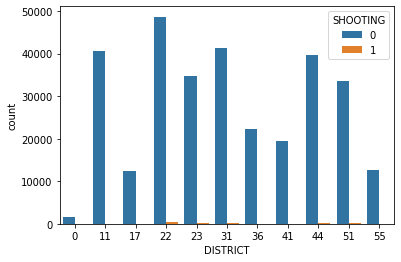

In [4]:
sns.countplot(X_train['DISTRICT'], hue=y_train)

На этих гистограммах мы видим, что некоторая зависимость стрельбы от района и времени все же есть, однако нужно увеличить количество записей с недоминантным классом, чтобы классификатор начал обращать на них свое внимание

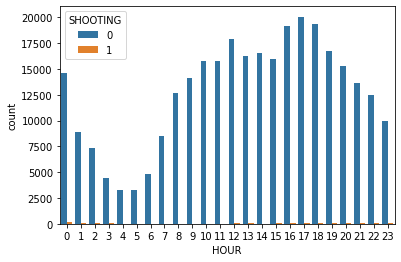

In [5]:
sns.countplot(X_train['HOUR'], hue=y_train)

Посмотрим как распределены признаки относительно друг друга:

D:\ana\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


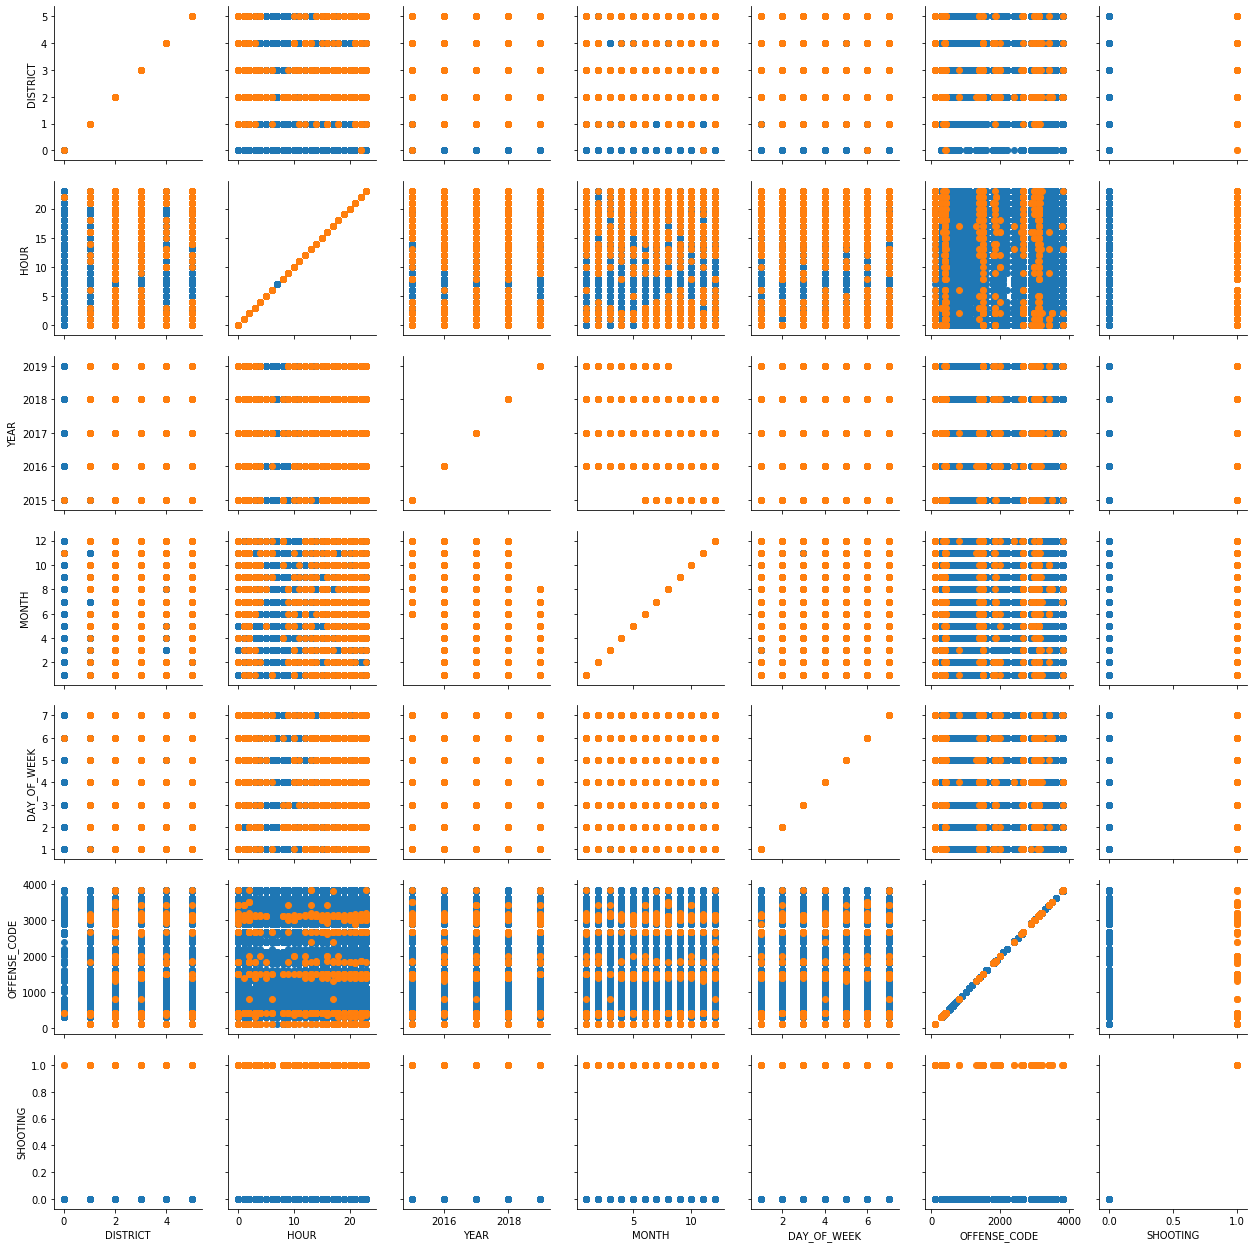

In [9]:
df_for_pairgrid = X_train[['DISTRICT', 'HOUR', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'OFFENSE_CODE']]
df_for_pairgrid['SHOOTING'] = y_train

sns.PairGrid(df_for_pairgrid, hue='SHOOTING').map(plt.scatter)

В этом виде легко делать выводы о закономерностях в данных.

## Нормализация признаков

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

print("Качество алгоритма до нормализации:",
      KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train).score(X_test, y_test))

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train, ), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

print("Качество алгоритма после нормализации:",
      KNeighborsClassifier(n_neighbors=8).fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

Качество алгоритма до нормализации: 0.995834914703335
Качество алгоритма после нормализации: 0.9959516927957649


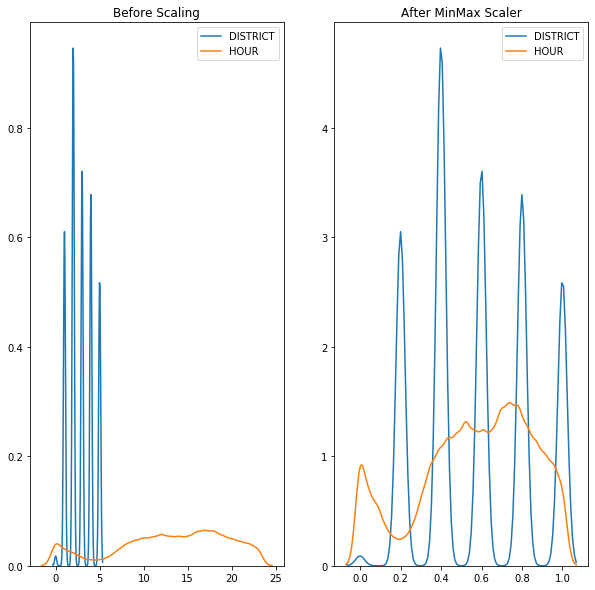

In [11]:
# графики
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['DISTRICT'], ax=ax1)
sns.kdeplot(X_train['HOUR'], ax=ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(X_train_scaled['DISTRICT'], ax=ax2)
sns.kdeplot(X_train_scaled['HOUR'], ax=ax2)
plt.show()

## Подбор алгоритма
Не всегда можно понять по визуализации данных, какой алгоритм может хорошо сработать (хотя конкретно в случае этого набора данных выбор очевиден - об этом в следующий раз =) ). Чтобы понять, над какой моделью можно работать, посмотрим на качество на нескольких простых моделях.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

for clf in [DecisionTreeClassifier(), SGDClassifier(), SVC(gamma='auto'), GaussianNB(), KNeighborsClassifier()]:
    print(clf.__class__.__name__, clf.fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

DecisionTreeClassifier 0.9948520324253837
SGDClassifier 0.9958933037495499
SVC 0.9958933037495499
GaussianNB 0.9958933037495499
KNeighborsClassifier 0.995834914703335


## Про стратификацию
Посмотрим на распределение классов в тренировочной выборке.

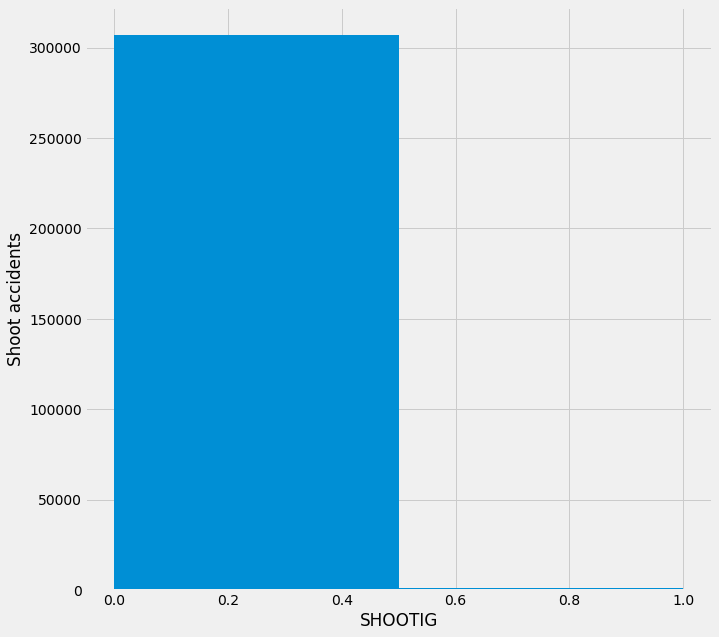

In [12]:
plt.style.use('fivethirtyeight')
plt.hist(y_train, bins=2);
plt.xlabel('SHOOTIG'); plt.ylabel('Shoot accidents');
#plt.title('isAlive Distribution');

Рассмотрим тупейший случай:

In [13]:
from sklearn.metrics import accuracy_score

a = np.ones(y_test.shape[0])
accuracy_score(y_test, a)

0.0041066962504500825

Точность, понятное дело, низкая, так как записей, относящихся к недоминантному классу, все еще очень мало. В следующем пункте это будет исправлено.

In [14]:
X_train_scaled.reset_index(inplace=True, drop=True)
y_train.reset_index(drop=True, inplace=True)

In [15]:
dead = X_train_scaled[y_train == 1]
for i in range (7):
    dead = pd.concat([dead,dead], ignore_index=True)
X_train_strat = pd.concat([X_train_scaled, dead], ignore_index=True)
y_train_strat = pd.concat([y_train, pd.Series(np.ones(X_train_strat.shape[0]-X_train_scaled.shape[0]))],
                          ignore_index=True)

Посмотрим на результаты обучения на стратифицированных данных:

In [16]:
y_train.value_counts()

0    307010
1      1264
Name: SHOOTING, dtype: int64

In [17]:
y_train_strat.value_counts()

0.0    307010
1.0    163056
dtype: int64

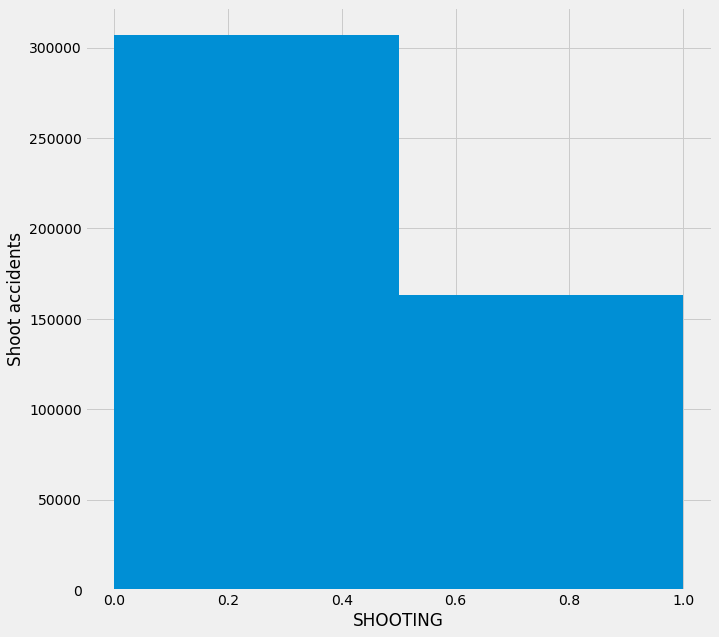

In [18]:
plt.style.use('fivethirtyeight')
plt.hist(y_train_strat, bins=2);
plt.xlabel('SHOOTING'); plt.ylabel('Shoot accidents');

In [ ]:
for clf in [DecisionTreeClassifier(), SGDClassifier(), SVC(gamma='auto'), GaussianNB(), KNeighborsClassifier()]:
    print(clf.__class__.__name__, clf.fit(X_train_strat, y_train_strat).score(X_test_scaled, y_test))

DecisionTreeClassifier 0.9956792105800951
SGDClassifier 0.6650901624188635


# Метрики качества
Посмотрим на предсказания константного классификатора

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, f1_score, fbeta_score, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

print('Accuracy:', accuracy_score(y_test, a))
print('Precision:', precision_score(y_test, a))
print('Recall:', recall_score(y_test, a))
print('ROC AUC:', roc_auc_score(y_test, a))
pr, rec, _ = precision_recall_curve(y_test, a)
print('PRC AUC:', auc(rec, pr))
print('F1:', f1_score(y_test, a))
print('F0.5:', fbeta_score(y_test, a, 0.5))
print('F2:', fbeta_score(y_test, a, 2))

Accuracy: 0.9959419612880623
Precision: 0.5316455696202531
Recall: 0.0995260663507109
ROC AUC: 0.5495822578936881
PRC AUC: 0.3174348044489548
F1: 0.16766467065868262
F0.5: 0.2845528455284553
F2: 0.11884550084889646


Рассмотрим метрики качества на различных алгоритмах:

In [19]:
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train, y_train)
a = clf.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, f1_score, fbeta_score, auc

print('Accuracy:', accuracy_score(y_test, a))
print('Precision:', precision_score(y_test, a))
print('Recall:', recall_score(y_test, a))
print('ROC AUC:', roc_auc_score(y_test, a))
pr, rec, _ = precision_recall_curve(y_test, a)
print('PRC AUC:', auc(rec, pr))
print('F1:', f1_score(y_test, a))
print('F0.5:', fbeta_score(y_test, a, 0.5))
print('F2:', fbeta_score(y_test, a, 2))

Accuracy: 0.9959419612880623
Precision: 0.5316455696202531
Recall: 0.0995260663507109
ROC AUC: 0.5495822578936881
PRC AUC: 0.3174348044489548
F1: 0.16766467065868262
F0.5: 0.2845528455284553
F2: 0.11884550084889646


In [23]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
a = clf.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, f1_score, fbeta_score, auc

print('Accuracy:', accuracy_score(y_test, a))
print('Precision:', precision_score(y_test, a))
print('Recall:', recall_score(y_test, a))
print('ROC AUC:', roc_auc_score(y_test, a))
pr, rec, _ = precision_recall_curve(y_test, a)
print('PRC AUC:', auc(rec, pr))
print('F1:', f1_score(y_test, a))
print('F0.5:', fbeta_score(y_test, a, 0.5))
print('F2:', fbeta_score(y_test, a, 2))

Accuracy: 0.9946184762405239
Precision: 0.38324420677361853
Recall: 0.509478672985782
ROC AUC: 0.7530488433183793
PRC AUC: 0.4473686509269078
F1: 0.4374364191251272
F0.5: 0.4032258064516129
F2: 0.47799021787461093


In [25]:
clf = GaussianNB()
clf.fit(X_train, y_train)
a = clf.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, f1_score, fbeta_score, auc

print('Accuracy:', accuracy_score(y_test, a))
print('Precision:', precision_score(y_test, a,average='weighted', labels=np.unique(a)))
print('Recall:', recall_score(y_test, a,average='weighted', labels=np.unique(a)))
print('ROC AUC:', roc_auc_score(y_test, a))
pr, rec, _ = precision_recall_curve(y_test, a)
print('PRC AUC:', auc(rec, pr))
print('F1:', f1_score(y_test, a,average='weighted', labels=np.unique(a)))
print('F0.5:', fbeta_score(y_test, a, 0.5,average='weighted', labels=np.unique(a)))
print('F2:', fbeta_score(y_test, a, 2,average='weighted', labels=np.unique(a)))

Accuracy: 0.9958933037495499
Precision: 0.9958933037495499
Recall: 1.0
ROC AUC: 0.5
PRC AUC: 0.5020533481252251
F1: 0.9979424269610329
F0.5: 0.9967119423888674
F2: 0.9991759534628504


In [38]:
clf = SGDClassifier()
clf.fit(X_train, y_train)
a = clf.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, f1_score, fbeta_score, auc

print('Accuracy:', accuracy_score(y_test, a))
print('Precision:', precision_score(y_test, a))            #почему-то пишет что нет предсказанных, 
print('Recall:', recall_score(y_test, a,average='weighted', labels=np.unique(a)))#так что спасает только дописка нескольких доп. параметров
print('ROC AUC:', roc_auc_score(y_test, a))
pr, rec, _ = precision_recall_curve(y_test, a)
print('PRC AUC:', auc(rec, pr))
print('F1:', f1_score(y_test, a,average='weighted', labels=np.unique(a)))
print('F0.5:', fbeta_score(y_test, a, 0.5,average='weighted', labels=np.unique(a)))
print('F2:', fbeta_score(y_test, a, 2,average='weighted', labels=np.unique(a)))

Accuracy: 0.9958933037495499
Precision: 0.0
Recall: 1.0
ROC AUC: 0.5
PRC AUC: 0.5020533481252251
F1: 0.9979424269610329
F0.5: 0.9967119423888674
F2: 0.9991759534628504


D:\download\ana\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
